
# Sect 14 - Hypothesis Testing - T-Tests

- online-ds-ft-070620
- 08/11/20



# Questions

# Topics / Learning Objectives

- Briefly Review: Normal distribution / Z-tests 
- Discuss Central Limit Theorem & Sampling
- The T-Distribution (and degrees of Freedom)
- Intro to AB Testing / Big-Picture Hypothesis Testing Workflow

# Resources

- **My Complete Outline / Resource Repo for Hypothesis Testing**
    - URL: https://github.com/jirvingphd/hypothesis_testing_workflow_python
    - Includes:
        - [Hypothesis Testing Slide Show (Code Academy)](https://github.com/jirvingphd/hypothesis_testing_workflow_python/blob/master/Hypothesis%20Testing%20with%20SciPy_codeacademy%20slides.pdf)
        - [Notebook with Full Hypothesis Testing Outline](https://nbviewer.jupyter.org/github/jirvingphd/hypothesis_testing_workflow_python/blob/master/hypothesis_testing_workflow.ipynb)
    
    
- [Hypothesis Testing Cheat Sheet](https://drive.google.com/file/d/17ePxNQdfM3OdrKEr_v0rVmivv9mNI_6I/view?usp=sharing)


# Section 14: Hypothesis Testing

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-onl01-dtsc-ft-030220/master/images/new_the-scientific-method.png">

## Foundations of a Sound Experiment

- **Control Group/Random Controlled Trials**

- **If humans are administering the experiment and/or grading/recording observations** about the groups, we should ideally use a **double blind** design (though single blind is better than nothing).

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-experimental-design-online-ds-pt-100719/master/images/new_double_blind.png" width=60%>

- **Sampling Techniques:**
    - Sampling is independent
    - Sample is collected randomly
    - Sample is approximately normally distributed
    - Appropriate sample size
    
- **Reproducibility**

## P-Values & Null Hypotheses

**_Null Hypothesis_**: There is no relationship between A and B   
Example: "There is no relationship between this flu medication and a reduced recovery time from the flu".

The _Null Hypothesis_ is usually denoted as $H_{0}$

**_Alternative Hypothesis_**: The hypothesis traditionally thought of when creating a hypothesis for an experiment  
Example: "This flu medication reduces recovery time for the flu."

The _Alternative Hypothesis_ is usually denoted as $H_{1}$


> **The one-sample $z$-test is used only for tests related to the sample mean.** 
<img src="https://raw.githubusercontent.com/learn-co-students/dsc-z-score-p-value-online-ds-pt-100719/master/images/pvalue.png" width=70%>


<!---<img src="https://raw.githubusercontent.com/jirvingphd/dsc-z-score-p-value-online-ds-ft-100719/master/images/cumprob2.png" width=400--->

$\alpha$ **_(alpha)_**: The marginal threshold at which you're okay with rejecting the null hypothesis. 
> If you set an alpha value of $\alpha = 0.05$, you're essentially saying "I'm okay with accepting my alternative hypothesis as true if there is less than a 5% chance that the results that I'm seeing are actually due to randomness."

**_p-value_**: The probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If you calculate a p-value and it comes out to 0.03, you can interpret this as saying "There is a 3% chance of obtaining the results I'm seeing when the null hypothesis is true."  




In simple terms:

$p < \alpha$: Reject the _Null Hypothesis_ and accept the _Alternative Hypothesis_

$p >= \alpha$: Fail to reject the _Null Hypothesis_.  


> **_Example One-Tail Hypothesis_**

$H_{1} : \mu_1 < \mu_2 $ The treatment group given this weight loss drug will lose more weight on average than the control group that was given a competitor's weight loss drug 

$ H_{0} : \mu1 >= \mu_2$  The treatment group given this weight loss drug will not lose more weight on average than the control group that was given a competitor's weight loss drug". 

> A **_Two-Tail Test_** is for when you want to test if a parameter falls between (or outside of) a range of two given values. 

**_Example Two-Tail Hypothesis_**

$H_{1} : \mu_1 \neq \mu_2$ "People in the experimental group that are administered this drug will not lose the same amount of weight as the people in the control group.  They will be heavier or lighter". 

$H_{0} : \mu_1 = \mu_2$ "People in the experimental group that are administered this drug will lose the same amount of weight as the people in the control group." 




***When in doubt, do a 2-tailed test***

In [1]:
!pip install -U fsds
from fsds.imports import *

fsds v0.2.22 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import scipy.stats as stats
x = np.arange(-4,4,.01)
y = stats.norm.pdf(x)

def plot_normal(x=None,y=None,mean=0,std=1,label='Normal Distribution'):
    """Plots x,y (normal distrubtion)"""
    
    ## Generate Distribution if x and y not provided
    if x is None:
        x = np.arange(-4,4,.01)
    if y is None:
        y = stats.norm.pdf(x,loc=mean,scale=std)

    ## Plot the distribution 
    fig,ax = plt.subplots(figsize=(10,6))
    ax.plot(x,y,lw=3,label=label)
    
    ## Plot the mean and std grid
    ax.axvline(mean,color='k',label='Mean',lw=2,ls='--',zorder=0)
    ax.grid(which='major',axis='x')
    
    ## Add labels
    ax.set(xlabel='Standard Deviation Units (sigma)',
           ylabel='Density',
           ylim=0,
           xlim=(round(min(x)),round(max(x))))
    ax.legend()
    
    return fig,ax

## The T-Distribution & T-Tests

- To adjust for small sample sizes, statisticians created the T-Distribution for hypothesis testing in lieu of the normal distribution.

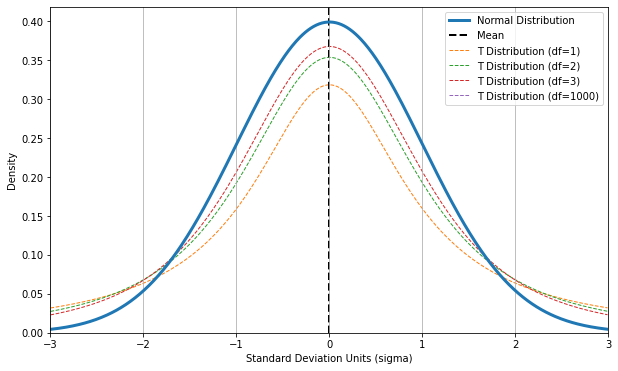

In [3]:
## The T-Distribution
x = np.arange(-3,3,.01)
y = stats.norm.pdf(x,loc=0,scale=1)

## Plot the Normal Distrubtion
fig,ax = plot_normal(x,y)#plt.subplots(figsize=(8,4),nrows=1)
# ax.plot(x,y,zorder=-1,lw=3,label='Normal Distribution')

## Adding T-Distribution 
for degrees_freedom in [1,2,3,1000]:#,5]:#,10,1000]:
#     degrees_freedom=5
    y_T = stats.t.pdf(x,df=degrees_freedom)

    ax.plot(x,y_T,zorder=-1,ls='--',lw=1,label=f'T Distribution (df={degrees_freedom})')
ax.legend()


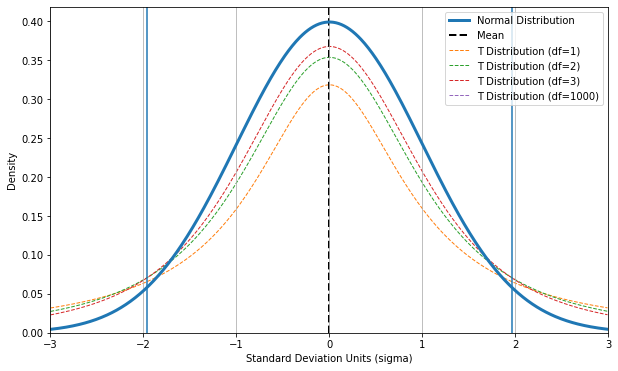

In [4]:
## Confidence Interval
ci_low,ci_high = stats.t.interval(alpha = 0.95, # Confidence level
                 df= len(x)-1, # Degrees of freedom
                 loc = 0,  # Sample mean
                 scale = 1) # Standard deviation estimate

ax.axvline(ci_low)
ax.axvline(ci_high)
fig


# Hypothesis Testing Overview (not in notebook)

- Hypothesis Testing Workflow:
    - https://github.com/jirvingphd/hypothesis_testing_workflow_python

- Review Code Academy Slideshow pdf
- Review Hypothesis Testing Workflow README

## Hypothesis Testing Applied: Northwind's Discounts 

### Hypothesis 1

> Do discounted items sell sell in greater/lesser quantities than full price products?

- $H_0$: Discounted items sell in similar quantities as full price items?
- $H_A$: Discounted items sell in different quantities vs full price items.

## HYPOTHESIS TESTING STEPS

- Separate data in group vars.
- Visualize data and calculate group n (size)

    
* Select the appropriate test based on type of comparison being made, the number of groups, the type of data.


- For t-tests: test for the assumptions of normality and homogeneity of variance.

    1. Check if sample sizes allow us to ignore assumptions, and if not:
    2. **Test Assumption Normality**

    3. **Test for Homogeneity of Variance**

    4. **Choose appropriate test based upon the above** 
    
    
* **Perform chosen statistical test, calculate effect size, and any post-hoc tests.**
    - To perform post-hoc pairwise comparison testing
    - Effect size calculation
        - Cohen's d

## Statistical Tests Summary Table



| Parametric tests (means) | Function | Nonparametric tests (medians) | Function |
 | --- | --- | --- | --- |
 | 1-sample t test |`scipy.stats.ttest_1samp()`|  1-sample Wilcoxon |`scipy.stats.wilcoxon`|
 | 2-sample t test |`scipy.stats.ttest_ind()` | Mann-Whitney U test |`scipy.stats.mannwhitneyu()` |
 | One-Way ANOVA | `scipy.stats.f_oneway()` | Kruskal-Wallis | `scipy.stats.kruskal` | 
 
 
 | Factorial DOE with one factor and one blocking variable |Friedman test  |


# Real-World Science / Experimental Design

> ## The Role of Stress Neurons in the Amygdala in Addiction/Binge Drinking

- We will be talking through some of the experiments from my Postdoctoral research on the roll of stress neurons in the escalation of binge drinking.
- [James' Neuroscience Research Poster: Society for Neuroscience 2016](https://drive.google.com/open?id=14z2dUdPB_8ei3HA7R1j3ylwEP0kVZhJq)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">



#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

## Hypothesis 

- Based on prior evidence in the field, stress neurons in the amygdala are believed to be responsible for the negative emotions that promote binge consumption to relieve negative symptoms

$ H_1$: Increasing the activity of stress neurons (CRF neurons) in the amygdala will increase the amount of alcohol consumed by binge-drinking mice.

$H_0$: Stimulation of CRF neurons has no effect on the amount of alcohol consumed.

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_preds1.png" width=60%>

## Experimental Design

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/opto_6steps.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1_no_mouse.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/hypothesis_testing_lessons/master/images/jmi_poster_fig1.png">--->

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

#### The Opponent-Process Theory of Addiction 


<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/robinson-berridge-fig1.jpg">

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

In [5]:
from fsds.imports import *

In [6]:
plt.style.use('seaborn-notebook')
pd.set_option('display.max_columns',0)
pd.set_option('display.precision',3)

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/jmi_poster_fig2.png">

<!---
<img src="https://raw.githubusercontent.com/jirvingphd/fsds_100719_cohort_notes/master/images/sect_20_neuro_data.png">')
--->

# Obtaining/Preprocessing Data

In [7]:
import os
print(os.getcwd())
# os.listdir('../../datasets/')

/Users/jamesirving/Documents/GitHub/_STUDY GROUP PREP/fsds_070620_FT_cohort_notes/Mod_2/sect_14


In [8]:
df = pd.read_csv('../../datasets/mouse_drinking_data_cleaned.csv',#"../../datasets/mouse_drinking_data_cleaned.csv")#,
                 index_col=0)
df.drop('Sex',inplace=True,axis=1)
df 

,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
Mouse_ID,,,,,,,,,,,,,,,,,,,,,
1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578


#### Laying Out Our Approach

1. Make a **dict/lists of the column names** that should be **averaged together** (`col_dict`)

2. Make a new df of means using `col_dict`

3. Make a grp dict using  `df_means.groupby('Group').groups` 

- Visualize the two populations

- Prepare for hypothesis tests
    - Either use `grps` dict to reference the correct columsn to pass into tests

<!---
**Variables:**

- `col_dict` (dict): dict of column names to be grouped together for means
- `df_means` (df): df of col_dict column means.
- `grps` (dict): groupby dict where keys = 'Group' column and values = row indices

- `data` (dict): Dictionary of...
    - Series of each phase by group? --->

In [9]:
## Loop through the differnet phases of the experiment
phases = ['BL','S','PS','R1','R2']

## save corresponding column names as values 
col_dict = {}
for phase in phases:
    col_dict[phase] = [col for col in df.columns if col.startswith(phase) ]
col_dict    

{'BL': ['BL1', 'BL2', 'BL3', 'BL4'],
 'S': ['S1', 'S2', 'S3', 'S4'],
 'PS': ['PS1', 'PS2', 'PS3', 'PS4'],
 'R1': ['R1_1', 'R1_2', 'R1_3', 'R1_4'],
 'R2': ['R2_1', 'R2_2', 'R2_3', 'R2_4']}

In [10]:
## Get then opposite of col_dict
phase_dict = {}
for phase,colnames in col_dict.items():
    for col in colnames:
        phase_dict[col] = phase
phase_dict

{'BL1': 'BL',
 'BL2': 'BL',
 'BL3': 'BL',
 'BL4': 'BL',
 'S1': 'S',
 'S2': 'S',
 'S3': 'S',
 'S4': 'S',
 'PS1': 'PS',
 'PS2': 'PS',
 'PS3': 'PS',
 'PS4': 'PS',
 'R1_1': 'R1',
 'R1_2': 'R1',
 'R1_3': 'R1',
 'R1_4': 'R1',
 'R2_1': 'R2',
 'R2_2': 'R2',
 'R2_3': 'R2',
 'R2_4': 'R2'}

### Calculating individual mouse means by phase

In [11]:
cols = col_dict['BL']
df[cols].mean(axis=1)

Mouse_ID
1     697.00
2     781.00
3     658.25
4     863.50
5     576.25
6     639.25
7     795.75
8     559.50
9     706.25
10    806.50
11    645.25
12    549.00
13    602.00
14    732.50
15    618.00
16    477.25
17    316.00
18    807.50
19    540.25
20    282.75
21    408.25
22    211.00
dtype: float64

In [12]:
df_means = df.reset_index()[['Mouse_ID','Group']].copy()
df_means

,Mouse_ID,Group
0,1,Control
1,2,Control
2,3,Control
3,4,Control
4,5,Experimental
5,6,Experimental
6,7,Experimental
7,8,Experimental
8,9,Experimental
9,10,Experimental


In [13]:
## Calculated the means by phase
df_means = df.reset_index(drop=False)[['Mouse_ID','Group']].copy()

for phase, cols in col_dict.items():
    df_means[phase] = df[cols].mean(axis=1)
df_means

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,NaN,NaN,NaN,NaN,NaN
1,2,Control,697.00,703.50,645.25,289.50,578.75
2,3,Control,781.00,808.75,655.75,356.75,803.25
3,4,Control,658.25,788.00,864.50,443.75,686.00
4,5,Experimental,863.50,671.50,704.25,402.25,663.25
5,6,Experimental,576.25,605.50,603.00,619.75,715.75
6,7,Experimental,639.25,513.25,618.50,808.75,817.50
7,8,Experimental,795.75,815.25,645.75,588.00,867.00
8,9,Experimental,559.50,524.00,525.25,106.00,190.00
9,10,Experimental,706.25,695.50,547.75,268.75,510.25


In [14]:
df

,Group,BL1,BL2,BL3,BL4,S1,S2,S3,S4,PS1,PS2,PS3,PS4,R1_1,R1_2,R1_3,R1_4,R2_1,R2_2,R2_3,R2_4
Mouse_ID,,,,,,,,,,,,,,,,,,,,,
1,Control,665,863,631,629,583,801,723,707,732,680,684,485,65,301,351,441,675,554,541,545
2,Control,859,849,685,731,854,1103,645,633,733,662,605,623,128,268,462,569,988,728,933,564
3,Control,589,507,635,902,699,743,761,949,872,952,828,806,129,311,669,666,516,579,913,736
4,Control,939,909,850,756,807,617,526,736,743,625,690,759,281,357,386,585,565,550,806,732
5,Experimental,710,505,494,596,620,589,676,537,779,537,581,515,477,659,737,606,713,682,709,759
6,Experimental,564,808,589,596,591,580,419,463,707,625,547,595,532,951,901,851,807,858,802,803
7,Experimental,722,732,783,946,882,723,764,892,621,764,720,478,297,558,803,694,855,797,938,878
8,Experimental,497,649,586,506,546,493,456,601,437,462,704,498,10,44,86,284,212,133,141,274
9,Experimental,741,668,778,638,759,791,568,664,390,346,773,682,3,212,417,443,486,444,533,578


### Getting Group Data For EDA & Testing

In [15]:
## Get grps 
data = {}

## Two different ways of using groupby
grps = df_means.groupby('Group').groups

## For each group
for grp in grps:
    
    ## Save the group df as grp name 
    data[grp] = df_means.groupby('Group').get_group(grp)
    
    # Display data
    display(data[grp].head().style.set_caption(grp))

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,nan,nan,nan,nan,nan
1,2,Control,697.000,703.500,645.250,289.500,578.750
2,3,Control,781.000,808.750,655.750,356.750,803.250
3,4,Control,658.250,788.000,864.500,443.750,686.000
11,12,Control,645.250,723.750,686.250,623.000,702.250


,Mouse_ID,Group,BL,S,PS,R1,R2
4,5,Experimental,863.500,671.500,704.250,402.250,663.250
5,6,Experimental,576.250,605.500,603.000,619.750,715.750
6,7,Experimental,639.250,513.250,618.500,808.750,817.500
7,8,Experimental,795.750,815.250,645.750,588.000,867.000
8,9,Experimental,559.500,524.000,525.250,106.000,190.000


In [16]:
data.keys()

dict_keys(['Control', 'Experimental'])

In [17]:
data['Control']

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,NaN,NaN,NaN,NaN,NaN
1,2,Control,697.00,703.50,645.25,289.50,578.75
2,3,Control,781.00,808.75,655.75,356.75,803.25
3,4,Control,658.25,788.00,864.50,443.75,686.00
11,12,Control,645.25,723.75,686.25,623.00,702.25
12,13,Control,549.00,437.25,469.25,273.00,518.75
13,14,Control,602.00,444.00,529.75,372.00,465.75
14,15,Control,732.50,518.25,629.25,467.50,636.50
21,22,Control,408.25,510.25,524.25,504.75,855.25


### Plotting Group Means + Standard Error of the Mean

In [59]:
from scipy.stats import sem

## Create lists for saving x,y, and yerr
x = []
y = []
y_err = []

## Select a phase to visualize
phase = "BL"

# For each group
for group in data:
    
    ## grab the correct phasen col from group data
    grp_data = data[group][phase]
    
    ## Save x,y 
    x.append(group)
    y.append(grp_data.mean())
    
    ## Calc and save error
    y_err.append(sem(grp_data))
    

In [60]:
y_err

[nan, 51.01579900410866]

<BarContainer object of 2 artists>

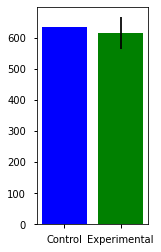

In [61]:
fig,ax = plt.subplots(figsize=(2,4))
plt.bar(x,y,yerr=y_err,color=['b','g'])


In [62]:
def plot_bars_yerr(data,phase = "BL"):
    """Plots the group means +/- standard error of the mean."""
    from scipy.stats import sem

    ## Save x,y, and yerr
    x = []
    y = []
    y_err = []
    
    for group in data:
        grp_data = data[group][phase]
        x.append(f"{group}")
        y.append(grp_data.mean())
        y_err.append(sem(grp_data))
        
    fig,ax = plt.subplots(figsize=(3,5))
    ax.bar(x,y,yerr=y_err,color=['k','b'])
    ax.set_title(f"Phase = {phase}")
    ax.set(ylabel='# of Licks')
    
    return fig,ax

### Run 2-sample T-Test on Baseline Days

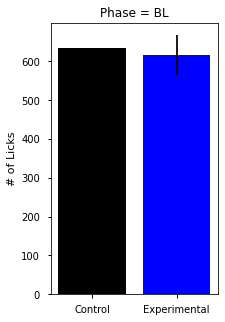

In [63]:
f,a = plot_bars_yerr(data,phase = "BL")

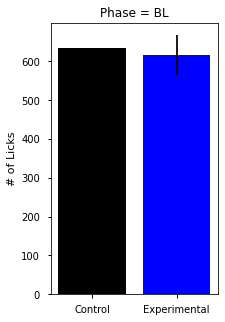

In [64]:
test_phase = "BL"
f,a = plot_bars_yerr(data,phase)

In [65]:
for grp in data:
    pass

for grp,grp_df in data.items():
    print(grp)
#     display(grp_df)
grp_df

Control
Experimental


,Mouse_ID,Group,BL,S,PS,R1,R2
4,5,Experimental,863.50,671.50,704.25,402.25,663.25
5,6,Experimental,576.25,605.50,603.00,619.75,715.75
6,7,Experimental,639.25,513.25,618.50,808.75,817.50
7,8,Experimental,795.75,815.25,645.75,588.00,867.00
8,9,Experimental,559.50,524.00,525.25,106.00,190.00
9,10,Experimental,706.25,695.50,547.75,268.75,510.25
10,11,Experimental,806.50,913.75,890.00,640.75,694.00
15,16,Experimental,618.00,587.25,477.75,257.25,559.75
16,17,Experimental,477.25,587.25,788.75,647.25,1082.75
17,18,Experimental,316.00,519.25,502.50,582.75,591.50


In [66]:
import scipy.stats as st
test_phase = 'BL'
## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])
results

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



[['Group', 'n', 'Normaltest Stat', 'p', 'sig?'],
 ['Control', 9, nan, nan, False],
 ['Experimental', 13, 0.7406609338476349, 0.6905061035007707, False]]

In [67]:
pd.DataFrame(results[1:],columns=results[0])

,Group,n,Normaltest Stat,p,sig?
0,Control,9,NaN,NaN,False
1,Experimental,13,0.741,0.691,False


### Adding Levene's Test

In [68]:
import scipy.stats as st

## Make list of list of headers
results = [['Group','n','Normaltest Stat','p','sig?']]

## Make an empty list for our group data
test_equal_var = []

## Loop through the data dictionary 
for grp,grp_df in data.items():
   
    ## Grab the correct phase column from the group df
    grp_data = grp_df[test_phase].copy()
    ## Append group data to list of group data
    test_equal_var.append(grp_data)
    
    ## Test for nomrality and save result 
    stat,p = st.normaltest(grp_data)
    results.append([grp,len(grp_data),stat,p,p<.05])


## Test for equal variance
stat, p = st.levene(*test_equal_var)
results.append(['Equal Variance','all',stat,p,p<.05])
    
results_df = pd.DataFrame(results[1:],columns=results[0])
results_df

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Group,n,Normaltest Stat,p,sig?
0,Control,9,NaN,NaN,False
1,Experimental,13,0.741,0.691,False
2,Equal Variance,all,NaN,NaN,False


### Run Correct Test

In [69]:
st.mannwhitneyu(*test_equal_var)

MannwhitneyuResult(statistic=50.0, pvalue=0.29659312730085824)

In [70]:
## Functionize code for testing other phases
import scipy.stats as st
def test_assumptions(data,test_phase):#,plot=True):

    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

In [71]:
res_df=  test_assumptions(data,'S')
res_df

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,S,Control,9,NaN,NaN,False
1,S,Experimental,13,8.111,0.017,True
2,S,Equal Variance,all,NaN,NaN,False


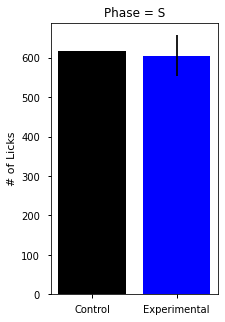

In [72]:
fig,ax = plot_bars_yerr(data,phase='S')

In [73]:
## Add Plotting to function
import scipy.stats as st
def test_assumptions(data,test_phase,plot=True):

    if plot:
        fig,ax = plot_bars_yerr(data,phase=test_phase)
        
    ## Make list of list of headers
    results = [['Phase','Group','n','Normaltest Stat','p','sig?']]

    ## Make an empty list for our group data
    test_equal_var = []

    ## Loop through the data dictionary 
    for grp,grp_df in data.items():

        ## Grab the correct phase column from the group df
        grp_data = grp_df[test_phase].copy()
        ## Append group data to list of group data
        test_equal_var.append(grp_data)

        ## Test for nomrality and save result 
        stat,p = st.normaltest(grp_data)
        results.append([test_phase,grp,len(grp_data),stat,p,p<.05])


    ## Test for equal variance
    stat, p = st.levene(*test_equal_var)
    results.append([test_phase,'Equal Variance','all',stat,p,p<.05])

    results_df = pd.DataFrame(results[1:],columns=results[0])
    return results_df

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,BL,Control,9,NaN,NaN,False
1,BL,Experimental,13,0.741,0.691,False
2,BL,Equal Variance,all,NaN,NaN,False


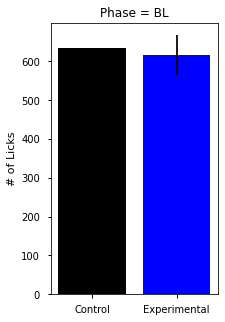

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,S,Control,9,NaN,NaN,False
1,S,Experimental,13,8.111,0.017,True
2,S,Equal Variance,all,NaN,NaN,False


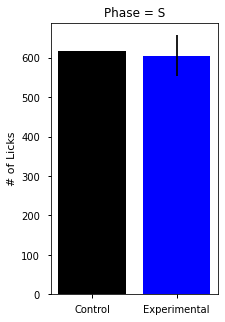

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,PS,Control,9,NaN,NaN,False
1,PS,Experimental,13,2.936,0.23,False
2,PS,Equal Variance,all,NaN,NaN,False


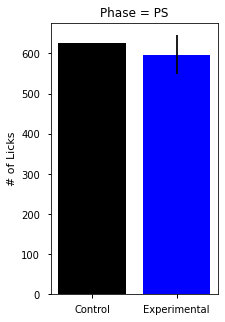

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,R1,Control,9,NaN,NaN,False
1,R1,Experimental,13,1.559,0.459,False
2,R1,Equal Variance,all,NaN,NaN,False


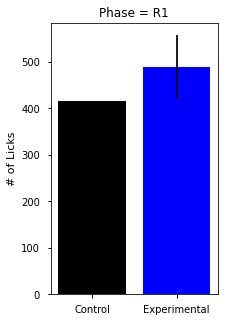

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=9

/Users/jamesirving/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=13



,Phase,Group,n,Normaltest Stat,p,sig?
0,R2,Control,9,NaN,NaN,False
1,R2,Experimental,13,0.216,0.898,False
2,R2,Equal Variance,all,NaN,NaN,False


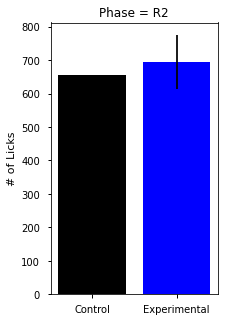

In [74]:
RESULTS = {}
for phase in phases:
    res_df = test_assumptions(data,phase)
    
    display(res_df)
    plt.show()
    

In [75]:
df_means

,Mouse_ID,Group,BL,S,PS,R1,R2
0,1,Control,NaN,NaN,NaN,NaN,NaN
1,2,Control,697.00,703.50,645.25,289.50,578.75
2,3,Control,781.00,808.75,655.75,356.75,803.25
3,4,Control,658.25,788.00,864.50,443.75,686.00
4,5,Experimental,863.50,671.50,704.25,402.25,663.25
5,6,Experimental,576.25,605.50,603.00,619.75,715.75
6,7,Experimental,639.25,513.25,618.50,808.75,817.50
7,8,Experimental,795.75,815.25,645.75,588.00,867.00
8,9,Experimental,559.50,524.00,525.25,106.00,190.00
9,10,Experimental,706.25,695.50,547.75,268.75,510.25
